
# Integrais en varias dimensións


In [1]:
import time
print(' Última execución  ', time.asctime() )

 Última execución   Tue Apr  2 16:01:11 2024



Estrutura temática:
-  Integral en 3D: Exemplo de integral nun volume dado.
-  Cambio de variables



### Obxectivos

 Ampliar a integral dunha función escalar bidimensional.

 Definición de rexións en varias dimensións.

 Ampliar como integrar cun cambio de variables.

 Mostrar algúns exemplos sinxelos


*Nota*

Para que este notebook funcione en colab, precisamos <a href = "https://www.dropbox.com/scl/fi/wwz2w43kqj0s38gm87roj/graph_utils.py?rlkey=rppkwu9tmbnnsojezzj69p1r0&dl=1"> graph_utils.py</a>. Podes descargalo premendo na ligazón, e subilo a colab:


<img src="https://www.dropbox.com/scl/fi/b35vcated0f9lwrw4jy01/colab_upload.jpg?rlkey=l1ag15r0ovkg2dsefze117k1y&raw=1" width=200 align="center" />

In [2]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
import graph_utils as gf

figsize = 6, 3.8
cmap    = 'hot'


## Extensión da integral a 3D

 Sexa unha función escalar, $f(x, y, z)$, e un prisma dado por: $[a, b] \times [c, d] \times [e, f]$. A integral da función no prisma é:

 $$
 \int_{V} f(x, y, z) \, \mathrm{d}x \mathrm{d}y \mathrm{d}z = \int_a^b \int_c^d \int_e^ff(x, y , z) \, \mathrm{d}x \mathrm{d}y \mathrm{d}z
 $$



**O teorema de Fubini** asegúranos que podemos integrar en calquera orde que queiramos.

 $$
 \int_a^b \int_c^d \int_e^ff(x, y, z) \, \mathrm{d}x \mathrm{d}y \mathrm{d}z =
 \int_a^b \left[ \int_c^d \left[ \int_e^ff(x, y, z) \, \mathrm{d}z \right] \mathrm{d}y \right] \mathrm{d} x
 $$

 $$
 = \int_e^f \left[ \int_c^d \left[ \int_a^bf(x, y, z) \, \mathrm{d}x \right] \mathrm{d}y \right] \mathrm{d }z = \; ...
 $$



### Integrais en volumes que non son un prisma.

 Considera o seguinte volume delimitado pola superficie $z = x^2 + y^2$ ata $z = 2$, con $x \ge 0$ e $y \ge 0$.

 A seguinte figura móstrache este volume.


In [3]:
rrange, phirange = (0, np.sqrt(2), 20), (0, np.pi/2, 20)
xfun  = lambda r, phi : r * np.cos(phi)
yfun  = lambda r, phi : r * np.sin(phi)
zfun  = lambda r, phi : r * r
ztop  = lambda r, phi : 2 + 0.*r # this is tricky
cero  = lambda r, phi : 0 + 0.*r

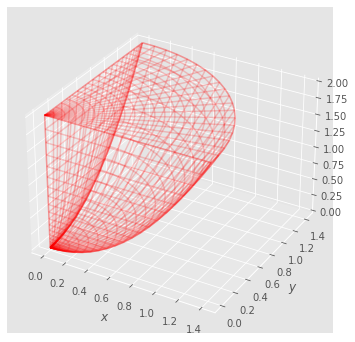

In [4]:
ax,fig = gf.wfsurface(xfun, yfun, zfun, rrange, phirange, alpha = 0.2, color = 'r');
gf.wfsurface(xfun, yfun, ztop, rrange, phirange, alpha = 0.2, color = 'r', newfig = [ax,fig])
gf.wfsurface(xfun, cero, zfun, rrange, phirange, alpha = 0.2, color = 'r', newfig = [ax,fig])
gf.wfsurface(cero, yfun, zfun, rrange, phirange, alpha = 0.2, color = 'r', newfig = [ax,fig]);


Imos definir o volume anterior como tipo I.

 A figura mostra a tapa superior, que nos permite determinar o rango de integración.

 O intervalo en $x$ é $[0, \sqrt{2}]$. Mentres se establece un valor de $x$, o intervalo de $y$ é $[0, \sqrt{2 - x^2}]$.


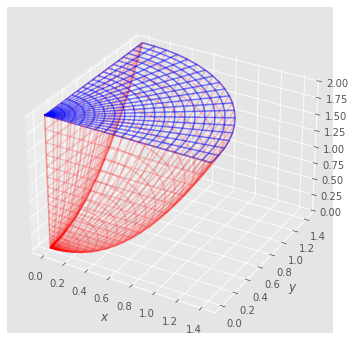

In [5]:
ax,fig = gf.wfsurface(xfun, yfun, zfun, rrange, phirange, alpha = 0.2, color = 'r');
gf.wfsurface(xfun, yfun, ztop, rrange, phirange, alpha = 0.5, color = 'b', newfig = [ax,fig])
gf.wfsurface(xfun, cero, zfun, rrange, phirange, alpha = 0.2, color = 'r', newfig = [ax,fig])
gf.wfsurface(cero, yfun, zfun, rrange, phirange, alpha = 0.2, color = 'r', newfig = [ax,fig]);

In [6]:
x0 = 0.5
y0 = 0.5
trange = (0., 1., 20)
xline = lambda t : x0 + 0. * t 
yline = lambda t : y0 + 0. * t
zline = lambda t : (1 - t) * (x0*x0 + y0*y0) + 2. * t


A figura mostra o segmento en $z$ de integración fixado nun punto $(x, y)$, que corresponde a $[x^2 + y^2, 2].$

Escollemos $x_0 = y_0 = \frac{1}{2}$, co que o rango de $z$ será desde $z_0 = \left( \frac{1}{2} \right)^2 + \left( \frac{1}{2} \right)^2 = \frac{1}{2} $ ata 2.

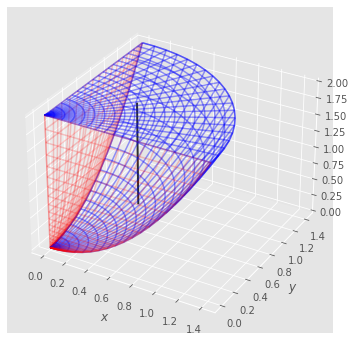

In [7]:
ax,fig = gf.wfsurface(xfun, yfun, zfun, rrange, phirange, alpha = 0.4, color = 'b');
gf.wfsurface(xfun, yfun, ztop, rrange, phirange, alpha = 0.4, color = 'b', newfig = [ax,fig])
gf.wfsurface(xfun, cero, zfun, rrange, phirange, alpha = 0.2, color = 'r', newfig = [ax,fig])
gf.wfsurface(cero, yfun, zfun, rrange, phirange, alpha = 0.2, color = 'r', newfig = [ax,fig]);
gf.line3d(xline, yline, zline, trange, alpha = 0.5, color = 'black', newfig = [ax,fig]);


O volume defínese como:

 $$
 { 0 \le x \le \sqrt{2}, \; 0 \le y \le \sqrt{2-x^2}, \; x^2 + y^2 \le z \le 2 }
 $$

 Entón a integral pasa a ser:

$$
\int_0^{\sqrt{2}} \left[ \int_0^{\sqrt{2-x^2}} \left[ \int_{x^2+y^2}^2 f(x, y, z) \, \mathrm{d}z \right]\mathrm{d}y\right] \mathrm{d}x
$$



En 3 dimensións podemos definir un volume con 6 tipos diferentes, para simular como definimos rexións en 2 dimensións.

 Por exemplo, o volume tipo I sería:

$$
\{ a \le x \le b, \, \phi_0(x) \le y \le \phi_1(x), \, \gamma_0(x, y) \le z \le \gamma_1(x, y) \}
$$

 onde o intervalo de integración en $x$ é $[a, b]$. Dado un valor de $x$, os límites de integración en $y$ veñen dados polas funcións reais $[\phi_0(x), \phi_1(x)]$. E finalmente, dado un punto $(x, y)$, os límites de integración en $z$ veñen dados polas funcións escalares $[\gamma_0(x, y), \gamma_1(x, y)]$.



A integral é:

$$
\int_a^b \left[ \int_{\phi_0(x)}^{\phi_1(x)} \left[ \int_{\gamma_0(x, y)}^{\gamma_1(x,y)} f(x, y, z) \, \mathrm{d}z \right] \mathrm{d}y \right] \mathrm{d}x
$$


 No caso en que $f(x, y, z) = 1$, a integral corresponde ao volume.



*Exercicio* : Integra a función $f(x, y, z) = x$ no volume anterior.


$$
\int_0^{\sqrt{2}} \left[ \int_0^{\sqrt{2-x^2}} \left[ \int_{x^2+y^2}^2 x \, \mathrm{d}z \right] \mathrm{d}y \right] \mathrm{d}x 
= \int_0^{\sqrt{2}} \left[ \int_0^{\sqrt{2-x^2}} x \, z \Big|_{x^2+y^2}^2 \mathrm{d}y\right] \mathrm{d}x 
$$


$$
= \int_0^{\sqrt{2}} \left[ \int_0^{\sqrt{2-x^2}} x \, (2-  x^2- y^2) \mathrm{d}y\right] \mathrm{d} x 
= \int_0^{\sqrt{2}} \left. x(2-x^2) y - x \frac{y^3}{3} \right|_0^{\sqrt{2-x^2}}  \mathrm{d}x 
$$


$$
= \int_0^{\sqrt{2}}  \frac{2x}{3}(2-x^2)^{3/2} \mathrm{d} x 
= \left. -\frac{2}{15} (2-x^2)^{5/2} \right|_0^{\sqrt{2}}
= \frac{8}{15} \sqrt{2}
$$

In [8]:
z0 = 0.5 * 2.
y0 = 0.5 * np.sqrt(z0)
xval = lambda r, phi : r * np.sqrt(z0/2.) * np.cos(phi)
yval = lambda r, phi : r * np.sqrt(z0/2.) * np.sin(phi)
zval = lambda r, phi : z0 + 0.*r
xline = lambda t : np.sqrt(z0 - y0*y0) * t 
yline = lambda t : y0 + 0. * t
zline = lambda t : z0 + 0. * t


Redefinimos o volume doutro tipo.

 O intervalo en $z$ é $[0, 2]$.

 A figura mostra o plano $(x, y)$ unha vez que se estableceu un valor de $z$ ($z_0=1$). A partir da ecuación $z = x^2 + y^2$, con $x = 0$, $y = \sqrt{z}$. O intervalo de $y$ é $[0, \sqrt{z}]$.

 A figura tamén mostra o segmento en $x$ unha vez que se fixa un punto $(y, z)$, como ($z_0=1$ e $y_0 = \frac{1}{2}$). O intervalo en $x$ é $[0, \sqrt{z - y^2}]$. Para $z_0=1$ e $y_0 = \frac{1}{2}$, $x \in [0, \sqrt{\frac{3}{4}}]$

 A partir da ecuación $z = x^2 + y^2$, $x = \sqrt{z - y^2}$.


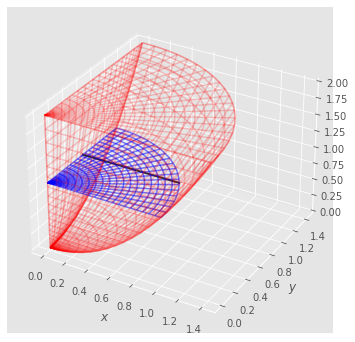

In [9]:
ax,fig = gf.wfsurface(xfun, yfun, zfun, rrange, phirange, alpha = 0.2, color = 'r');
gf.wfsurface(xfun, yfun, ztop, rrange, phirange, alpha = 0.2, color = 'r', newfig = [ax,fig])
gf.wfsurface(xfun, cero, zfun, rrange, phirange, alpha = 0.2, color = 'r', newfig = [ax,fig])
gf.wfsurface(cero, yfun, zfun, rrange, phirange, alpha = 0.2, color = 'r', newfig = [ax,fig]);
gf.wfsurface(xval, yval, zval, rrange, phirange, alpha = 0.5, color = 'b', newfig = [ax,fig])
gf.line3d(xline, yline, zline, trange, alpha = 0.5, color = 'black', newfig = [ax,fig]);


O volume pódese redefinir como:

$$
\{0 \le z \le 2, \; 0 \le y \le \sqrt{z}, \, 0 \le x \le \sqrt{z-y^2} \}
$$


 A integral queda:

 $$
 \int_0^2 \left[ \int_0^{\sqrt{z}} \left[ \int_0^{\sqrt{z-y^2}} f(x, y, z) \, \mathrm{d}x \right ]\mathrm{d}y\right] \mathrm{d}z
 $$



*Exercicio* : Repite a integral de $f(x, y, z) = x$ coa nova definición do volume.


$$
\int_0^2 \left[ \int_0^{\sqrt{z}} \left[ \int_0^{\sqrt{z-y^2}} x \, \mathrm{d}x \right]\mathrm{d}y\right] \mathrm{d}z
= \int_0^2 \left[ \int_0^{\sqrt{z}} \left. \frac{x^2}{2} \right|_0^{\sqrt{z-y^2}} \mathrm{d}y\right] \mathrm{d}z
$$

$$
= \int_0^2 \left[ \int_0^{\sqrt{z}} \frac{z-y^2}{2} \mathrm{d}y \right] \mathrm{d}z
= \int_0^2 \left. \frac{z}{2}y -\frac{y^3}{6} \right|_0^{\sqrt{z}} \mathrm{d}z
$$


$$
= \int_0^2 \frac{1}{3} z^{3/2}\mathrm{d}z
= \left. \frac{2}{15} z^{5/2} \right|_0^2 = \frac{8}{15} \sqrt{2}
$$


## Cambio de variables

 No caso anterior, a integral resólvese máis cómodamente en cilíndricas.

 Igual que vimos nas funcións escalares bidimensionais. Nas variables novas $(u, v, w)$, con $x(u, v, w), y(u, v, w), z(u, v, w)$, vén dada por:

$$
\int_{V} f(x, y, z) \, \mathrm{d}x \mathrm{d}y \mathrm{d}z 
= \int_{V'} f(u, v, w) \, |X| \, \mathrm{d}u \mathrm{d}v \mathrm{d}w 
$$

onde $V'$ é o volume e $f(u, v, w)$ a función nas novas variables.



Mentres que o elemento diferencial de volume:

 $$
 \mathrm{d}x \mathrm{d}y \mathrm{d}z \to |X| \, \mathrm{d}u \mathrm{d}v \mathrm{d}w
 $$
 
 Onde $|X|$ é o determinante da matriz xacobiana do cambio de variables:
 
 $$
 X =
\left| \begin{array}{ccc} 
\frac{\partial x}{\partial u} & \frac{\partial x}{\partial v} & \frac{\partial x}{\partial w} \\
\frac{\partial y}{\partial u} & \frac{\partial y}{\partial v} & \frac{\partial y}{\partial w} \\
\frac{\partial z}{\partial u} & \frac{\partial z}{\partial v} & \frac{\partial z}{\partial w} 
\end{array}\right|
 $$


**Cambio a cilíndricas**

Lembremos que o cambio a cilíndricas é:

$$
x(r, \phi, z) = r \cos \phi, \; y(r, \phi, z) = r \sin \phi, \; z(r, \phi, z) = z
$$

A matriz Xacobiana:

$$
\left(\begin{array}{ccc} 
\cos \phi  & -r \sin \phi & 0 \\
\sin \phi  & r \cos \phi  & 0 \\
0 & 0 & 1 \\
\end{array} \right)
$$

E o determinante do Xacobiano, $|X| = r$

Logo:

$$
\mathrm{d}x \mathrm{d}y \mathrm{d}z \to r \, \mathrm{d}r \mathrm{d}\phi \mathrm{d}z
$$



*Exercicio* : Calcula de novo a integral de $f(x, y, z) = x$ no volume anterior en coordenadas cilíndricas.



Podemos definir o volume como cilíndricas como:

$$
\{0 \le z \le 2,\; 0 \le \phi \le \pi/2, \, 0 \le r \le \sqrt{z} \}
$$

 A integral, como $x = r \cos \phi$, pasa a ser:

$$
\int_0^2 \left[ \int_0^{\pi/2} \left[ \int_0^{\sqrt{z}} r \cos \phi \, r \mathrm{d}r \right]\mathrm{d}\phi\right] \mathrm{d}z
$$



$$
\int_0^2  \sin \phi \Big|_0^{\pi/2} \left. \frac{r^3}{3} \right|_0^{\sqrt{z}}  \mathrm{d}z
= \int_0^2 \frac{z^{3/2}}{3} \mathrm{d}z 
= \left. \frac{2}{15} z^{5/2} \right|_0^2 = \frac{8}{15} \sqrt 2
$$


Alternativamente

$$
\{r^2 \le z \le 2,\; 0 \le \phi \le \pi/2, \, 0 \le r \le \sqrt{2} \}
$$

 A integral, como $x = r \cos \phi$, pasa a ser:

$$
\int_0^\sqrt{2} \left[ \int_0^{\pi/2} \left[ \int_2^{r^2} r \cos \phi \, r \mathrm{d}z \right]\mathrm{d}\phi\right] \mathrm{d}r
$$



$$
\int_0^2  \sin \phi \Big|_0^{\pi/2} \int_0^\sqrt{2} r^2 (2-r^2) \mathrm{d}r = \frac{2}{3} r^3 \Big|^\sqrt{2}_0 - \frac{1}{5} r^5 \Big|^\sqrt{2}_0 = \frac{4}{3} \sqrt{2} - \frac{4}{5} \sqrt{2} = \frac{20-12}{15}\sqrt{2}= \frac{8}{15} \sqrt 2
$$



**Cambio a esféricas**

 Lembremos o cambio de coordenadas esféricas:

$$
x(r, \phi, \theta) =  r \cos \phi \sin \theta, \; y(r, \phi, \theta) = r \sin \phi \sin \theta, \;  z(r, \phi, \theta) = r \cos \theta 
$$

 E a súa matriz xacobiana:

$$
\left( \begin{array}{ccc} 
\cos \phi \sin \theta & - r \sin \phi \sin \theta &  r \cos \phi \cos \theta \\
\sin \phi \sin \theta &   r \cos \phi \sin \theta &  r \sin \phi \cos \theta \\
          \cos \theta &                         0 & -r \sin \theta  
\end{array} \right)
$$

 E o determinante do xacobiano $|X| = r^2 \sin\theta$

 Polo tanto:

 $$
 \mathrm{d}x\mathrm{d}y\mathrm{d}z \to r^2 \sin\theta \, \mathrm{d}r\mathrm{d}\phi\mathrm{d}\theta
 $$


O xacobiano:

$$
|X| = |\cos \theta \left( -r^2 \sin^2 \phi \sin \theta \cos \theta - \\
- r^2 \cos^2 \phi \cos \theta \sin \theta \right) - r \sin \theta \left( r \cos^2 \phi \sin^2 \theta + r \sin^2 \phi \sin^2 \theta \right)|
$$

$$
=|-r^2 \sin \theta \cos^2 \theta - r^2 \sin^3 \theta | = |-r^2 \sin \theta | = r^2 \sin \theta
$$

A seguinte figura mostra o elemento diferencial de volume en coordenadas esféricas.

<img src="imgs/dv_esfericas.png" width="350"/>

Os lados do elemento diferencial son: $\mathrm{d}r$, $r\mathrm{d}\theta$ e $r \sin \theta \mathrm{d}\phi$.

*Exercicio* : Calcula a integral de $f(x, y, z) = e ^{(x^2 + y^2 + z^2)^{3/2}}$ na esfera de raio unidade.

 Definición de esfera de raio unidade:

$$
\{ 0 \le r \le 1, \, 0 \le \phi \lt 2 \pi, \, 0 \le \theta \le \pi \}
$$

A integral queda:

$$
\int_0^1 \int_0^{2\pi} \int_0^\pi e^{r^3} \, r^2 \sin \theta \;\mathrm{d}r \mathrm{d}\theta \mathrm{d} \phi = \phi \big|_0^{2\pi} (-\cos \theta) \big|_0^\pi \frac{1}{3} e^{r^3} \big|_0^1 = \frac{4 \pi}{3} (e-1)
$$